In [6]:
from __future__ import print_function, division

#importing pandas for reading and parsing of tabulated data
import pandas as pd
#importing geopandas read to plot geographical information
import geopandas as gpd
#importing fiona to handle geographical coordinates
import fiona
#import shapely to handle geographical shapes
import shapely

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [7]:
from pandas.io.gbq import read_gbq

In [10]:
#pull studio data

project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_studio`"

df_studio = read_gbq(query=sample_query, project_id=project, dialect='standard')

Requesting query... ok.
Query running...
Query done.
Processed: 42.1 kb

Retrieving results...
Got 81 rows.

Total time taken 5.46 s.
Finished at 2017-03-25 12:19:23.


In [12]:
df_studio["City"].unique()

array([u'San Francisco', u'Los Angeles', u'Washington', u'Miami Beach',
       u'Miami', u'Chicago', u'Boston', u'Cambridge', u'Saint Louis',
       u'Jersey City', u'New York', u'Philadelphia', u'Austin', u'Seattle'], dtype=object)

In [23]:
#only NYC

df_NYC_studio = df_studio.loc[df_studio['City'].isin(['New York'])]

In [38]:
df_NYC_studio['size'] = 1

/Users/tico/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
#pull 1br data

project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_1br`"

df_1br = read_gbq(query=sample_query, project_id=project, dialect='standard')

Requesting query... ok.
Query running...
Query done.
Processed: 136.0 kb

Retrieving results...
Got 274 rows.

Total time taken 3.25 s.
Finished at 2017-03-25 12:41:29.


In [32]:
#NYC 1-br

df_NYC_1br = df_1br.loc[df_1br['City'].isin(['New York'])]

In [40]:
df_NYC_1br['size'] = 2

/Users/tico/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
#pull 2-br

project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_neighborhood_2br`"

df_2br = read_gbq(query=sample_query, project_id=project, dialect='standard')

Requesting query... ok.
Query running...
Query done.
Processed: 141.7 kb

Retrieving results...
Got 292 rows.

Total time taken 3.13 s.
Finished at 2017-03-25 12:42:36.


In [33]:
#NYC-2-br
df_NYC_2br = df_2br.loc[df_2br['City'].isin(['New York'])]

In [41]:
df_NYC_2br['size'] = 3

/Users/tico/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
NYC_dfs = [df_NYC_studio, df_NYC_1br, df_NYC_2br]

df_NYC_hood = pd.concat(NYC_dfs)

In [46]:
df_NYC_hood

,City,CountyName,Metro,RegionName,SizeRank,State,_2010_02,_2010_03,_2010_04,_2010_05,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,size
37,New York,New York,New York,East Harlem,11,NY,NaN,NaN,NaN,NaN,...,2695.0,2650.0,2650.0,2695.0,2672.5,2700.0,2700.0,2650.0,2700.0,1
38,New York,Kings,New York,Bedford Stuyvesant,6,NY,NaN,NaN,NaN,NaN,...,1700.0,1750.0,1800.0,1725.0,1800.0,1899.5,1895.0,1662.5,1750.0,1
39,New York,Kings,New York,Crown Heights,8,NY,NaN,NaN,NaN,NaN,...,1795.0,1699.0,1700.0,1695.0,1650.0,1700.0,1753.0,1650.0,1850.0,1
40,New York,Queens,New York,Forest Hills,18,NY,NaN,NaN,NaN,NaN,...,1504.0,1550.0,1650.0,1575.0,1600.0,1550.0,1550.0,1525.0,1550.0,1
41,New York,Kings,New York,Williamsburg,5,NY,NaN,NaN,NaN,NaN,...,2600.0,2645.0,2715.0,2600.0,2600.0,2748.0,2600.0,2600.0,2900.0,1
42,New York,Queens,New York,Flushing,17,NY,NaN,NaN,NaN,NaN,...,1500.0,1475.0,1475.0,1375.0,1325.0,1515.0,1500.0,1500.0,1495.0,1
43,New York,Queens,New York,Hunters Point,68,NY,NaN,NaN,NaN,NaN,...,2325.0,2300.0,2328.0,2333.0,2350.0,2320.0,2295.0,2250.0,2225.0,1
44,New York,Kings,New York,Downtown,72,NY,NaN,NaN,NaN,NaN,...,2450.0,2483.0,2466.5,2520.0,2594.0,2515.0,2505.0,2471.5,2432.5,1
45,New York,Kings,New York,Flatbush,7,NY,NaN,NaN,NaN,NaN,...,1595.0,1500.0,1562.5,1550.0,1550.0,1525.0,1650.0,1525.0,1512.5,1
46,New York,New York,New York,Murray Hill,70,NY,NaN,NaN,NaN,NaN,...,2500.0,2400.0,2412.5,2500.0,2412.5,2400.0,2412.5,2412.5,2500.0,1


In [155]:
df_h = df_NYC_hood.drop(df_NYC.ix[:,'_2010_02':'_2015_09'].head(0).columns, axis=1)

In [167]:
df_h.reset_index(drop=True)

,City,CountyName,Metro,RegionName,SizeRank,State,_2015_10,_2015_11,_2015_12,_2016_01,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,size
0,New York,New York,New York,East Harlem,11,NY,2650.0,2650.0,2650.0,2575.0,...,2695.0,2650.0,2650.0,2695.0,2672.5,2700.0,2700.0,2650.0,2700.0,1
1,New York,Kings,New York,Bedford Stuyvesant,6,NY,1650.0,1600.0,1582.0,1600.0,...,1700.0,1750.0,1800.0,1725.0,1800.0,1899.5,1895.0,1662.5,1750.0,1
2,New York,Kings,New York,Crown Heights,8,NY,1997.0,1850.0,1750.0,1700.0,...,1795.0,1699.0,1700.0,1695.0,1650.0,1700.0,1753.0,1650.0,1850.0,1
3,New York,Queens,New York,Forest Hills,18,NY,1549.0,1543.0,1550.0,1531.0,...,1504.0,1550.0,1650.0,1575.0,1600.0,1550.0,1550.0,1525.0,1550.0,1
4,New York,Kings,New York,Williamsburg,5,NY,2800.0,2850.0,2795.0,2761.5,...,2600.0,2645.0,2715.0,2600.0,2600.0,2748.0,2600.0,2600.0,2900.0,1
5,New York,Queens,New York,Flushing,17,NY,1400.0,1337.5,1375.0,1450.0,...,1500.0,1475.0,1475.0,1375.0,1325.0,1515.0,1500.0,1500.0,1495.0,1
6,New York,Queens,New York,Hunters Point,68,NY,2350.0,2336.5,2325.0,2301.5,...,2325.0,2300.0,2328.0,2333.0,2350.0,2320.0,2295.0,2250.0,2225.0,1
7,New York,Kings,New York,Downtown,72,NY,2600.0,2536.0,2533.0,2567.5,...,2450.0,2483.0,2466.5,2520.0,2594.0,2515.0,2505.0,2471.5,2432.5,1
8,New York,Kings,New York,Flatbush,7,NY,1500.0,1500.0,1400.0,1400.0,...,1595.0,1500.0,1562.5,1550.0,1550.0,1525.0,1650.0,1525.0,1512.5,1
9,New York,New York,New York,Murray Hill,70,NY,2450.0,2600.0,2600.0,2550.0,...,2500.0,2400.0,2412.5,2500.0,2412.5,2400.0,2412.5,2412.5,2500.0,1


In [175]:
df_h['RegionName'].nunique()

98

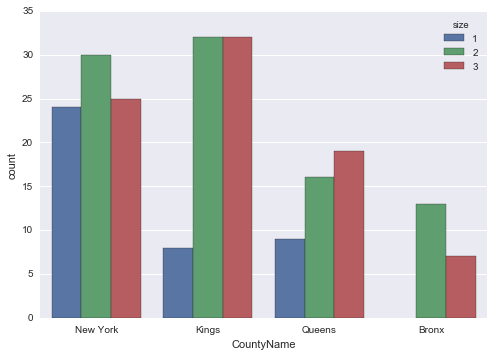

In [161]:
sns.countplot(data = df_h, x='CountyName', hue = 'size')

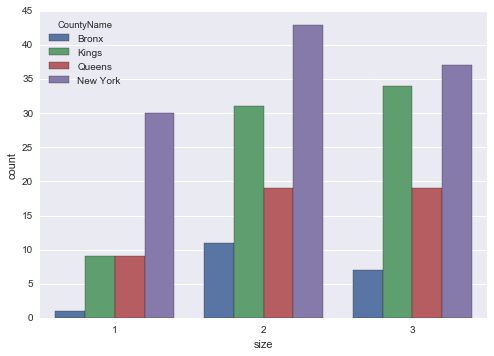

In [162]:
sns.countplot(data = df, hue = 'CountyName', x = 'size')

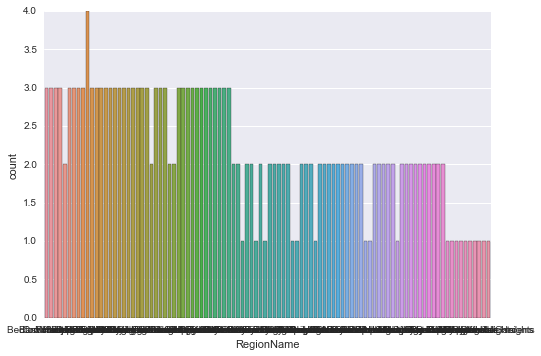

In [171]:
sns.countplot(data = df_h, x='RegionName')

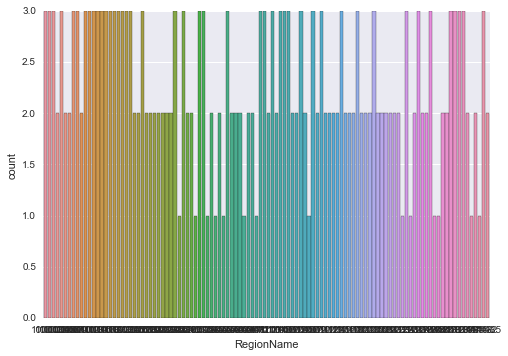

In [196]:
sns.countplot(data = df, x='RegionName')

In [47]:
project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_studio`"

df_studio_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')

Requesting query... ok.
Query running...
Query done.
Processed: 43.7 kb

Retrieving results...
Got 87 rows.

Total time taken 3.3 s.
Finished at 2017-03-25 13:01:55.


In [49]:
df_studio_zip = df_studio_zip.loc[df_studio_zip['City'].isin(['New York'])]

In [50]:
df_studio_zip['size'] = 1

In [51]:
#pull 1br data

project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_1br`"

df_1br_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')

Requesting query... ok.
Query running...
Query done.
Processed: 198.2 kb

Retrieving results...
Got 424 rows.

Total time taken 3.41 s.
Finished at 2017-03-25 13:05:17.


In [52]:
df_1br_zip = df_1br_zip.loc[df_1br_zip['City'].isin(['New York'])]

In [53]:
df_1br_zip['size'] = 2

In [58]:
#pull 2-br

project = "spheric-crow-161317"
sample_query = "SELECT * FROM `smart_cities_data.median_rents_zipcode_2br`"

df_2br_zip = read_gbq(query=sample_query, project_id=project, dialect='standard')

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 619 rows.

Total time taken 1.84 s.
Finished at 2017-03-25 13:09:01.


In [59]:
df_2br_zip = df_2br_zip.loc[df_2br_zip['City'].isin(['New York'])]

In [60]:
df_2br_zip['size'] = 3

In [64]:
NYC_dfs_zip = [df_studio_zip , df_1br_zip, df_2br_zip]

df_NYC = pd.concat(NYC_dfs_zip)

In [67]:
df = df_NYC.drop(df_NYC.ix[:,'_2010_02':'_2015_06'].head(0).columns, axis=1)

In [69]:
df.head()

,City,CountyName,Metro,RegionName,SizeRank,State,_2015_07,_2015_08,_2015_09,_2015_10,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,size
4,New York,Bronx,New York,10458,25,NY,1162.5,1100.0,1175.0,1175.0,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,1
9,New York,Kings,New York,11205,56,NY,2097.5,2000.0,1975.0,2000.0,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,1
12,New York,Kings,New York,11221,28,NY,1550.0,1597.5,1576.0,1750.0,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,1
16,New York,Queens,New York,11102,64,NY,2150.0,2150.0,2100.0,2045.0,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,1
18,New York,New York,New York,10038,76,NY,2850.0,2900.0,2885.0,2800.0,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,1


In [72]:
df = df[['CountyName', 'RegionName', 'SizeRank','_2015_07','_2015_08', '_2015_09', '_2015_10',
 '_2015_11', '_2015_12','_2016_01', '_2016_02', '_2016_03', '_2016_04', '_2016_05', '_2016_06',
 '_2016_07', '_2016_08','_2016_09','_2016_10','_2016_11','_2016_12','_2017_01','size']]

In [73]:
df.head()

,CountyName,RegionName,SizeRank,_2015_07,_2015_08,_2015_09,_2015_10,_2015_11,_2015_12,_2016_01,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,size
4,Bronx,10458,25,1162.5,1100.0,1175.0,1175.0,1199.0,1175.0,1200.0,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,1
9,Kings,11205,56,2097.5,2000.0,1975.0,2000.0,2200.0,2200.0,2150.0,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,1
12,Kings,11221,28,1550.0,1597.5,1576.0,1750.0,1750.0,1900.0,1800.0,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,1
16,Queens,11102,64,2150.0,2150.0,2100.0,2045.0,2150.0,2000.0,1975.0,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,1
18,New York,10038,76,2850.0,2900.0,2885.0,2800.0,2720.0,2712.5,2712.5,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,1


In [74]:
df = df.reset_index()

In [80]:
del df['index']

In [81]:
df.head()

,CountyName,RegionName,SizeRank,_2015_07,_2015_08,_2015_09,_2015_10,_2015_11,_2015_12,_2016_01,...,_2016_05,_2016_06,_2016_07,_2016_08,_2016_09,_2016_10,_2016_11,_2016_12,_2017_01,size
0,Bronx,10458,25,1162.5,1100.0,1175.0,1175.0,1199.0,1175.0,1200.0,...,1275.0,1275.0,1200.0,1297.5,1250.0,1300.0,1297.5,1275.0,1325.0,1
1,Kings,11205,56,2097.5,2000.0,1975.0,2000.0,2200.0,2200.0,2150.0,...,1995.0,1900.0,2000.0,2079.0,2079.0,2050.0,2150.0,2000.0,2000.0,1
2,Kings,11221,28,1550.0,1597.5,1576.0,1750.0,1750.0,1900.0,1800.0,...,1630.0,1700.0,1875.0,1772.5,1890.0,1895.0,1895.0,1695.0,1697.0,1
3,Queens,11102,64,2150.0,2150.0,2100.0,2045.0,2150.0,2000.0,1975.0,...,1800.0,1897.5,2100.0,1900.0,1775.0,1985.0,1900.0,1995.0,1750.0,1
4,New York,10038,76,2850.0,2900.0,2885.0,2800.0,2720.0,2712.5,2712.5,...,2872.5,2895.0,2750.0,2860.0,2750.0,2700.0,2733.0,2677.0,2632.5,1


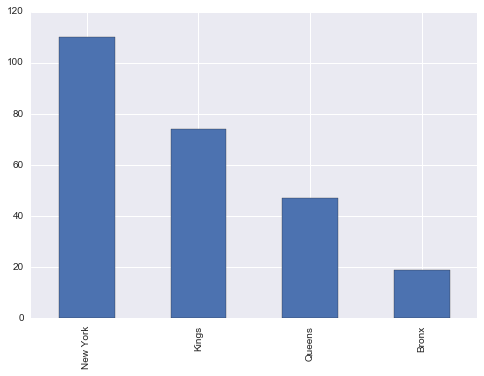

In [94]:
df.CountyName.value_counts().plot(kind='bar')

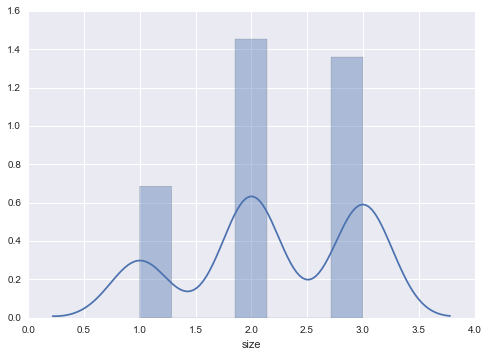

In [97]:
sns.distplot(df['size'])

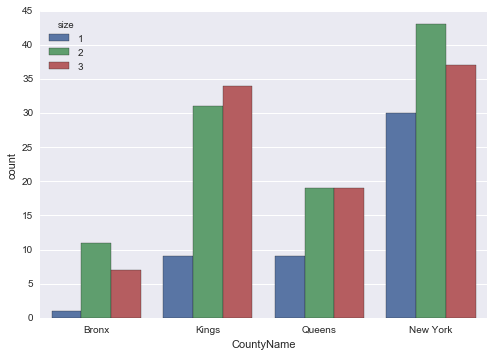

In [111]:
sns.countplot(data = df, x='CountyName', hue = 'size')

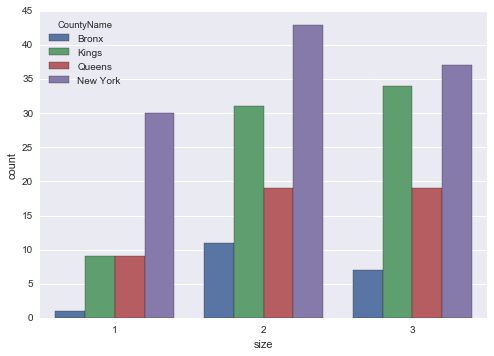

In [112]:
sns.countplot(data = df, hue = 'CountyName', x = 'size')

In [117]:
!pwd
!head -3 /Users/tico/NYC-OpenData/RealEstate-GIS/smart_cities/NYC_shapefiles/ParksProperties.geojson

/Users/tico/NYC-OpenData/RealEstate-GIS
{
  "type": "FeatureCollection",
  "features": [


In [119]:
parks = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/ParksProperties.geojson")

In [120]:
parks

,acres,address,borough,communityb,councildis,geometry,gispropnum,location,nys_assemb,nys_senate,signname,typecatego,us_congres,waterfront,zipcode
0,20.34,40-50 VERNON BOULEVARD,Q,"401, 402",26,(POLYGON ((-73.94806058617907 40.7558921243117...,Q104,"Queensboro Bridge, 41 Rd., 40 Ave. bet. The Ea...",37,12,Queensbridge Park,Community Park,12,Yes,11101
1,6.1,200 CITY ISLAND AV,X,210,13,(POLYGON ((-73.78243845176827 40.8440889832096...,X253,City Island Ave bet. Centre St. and Winter St.,82,34,Ambrosini Field,Recreation Field/Courts,14,Yes,10464
2,0.159,11528 Ocean Promenade,Q,414,32,(POLYGON ((-73.83638471337602 40.5780595390407...,Q494,"Beach 116 St., Ocean Promenade",23,15,Flight 587 Memorial Park,Triangle/Plaza,5,Yes,11694
3,0.44,1086 EAST 180 STREET,X,206,15,(POLYGON ((-73.87623969625949 40.8419878695552...,X245,E 180 St bet. the Bronx River and Devoe Av,87,33,River Garden,Garden,15,Yes,10460
4,4.893,31-30 VERNON BOULEVARD,Q,401,26,(POLYGON ((-73.93623823248316 40.7692821829763...,Q465,Vernon Blvd. bet. Broadway and 30 Dr.,37,12,Socrates Sculpture Park,Neighborhood Park,12,Yes,11106
5,8.663,3871 POLAR STREET,B,313,47,(POLYGON ((-74.00658983661403 40.5819294678948...,B379,Bay View Ave. between Sea Gate Ave. and W. 33 St.,46,23,Coney Island Creek Park,Nature Area,8,Yes,11224
6,6.611,2 KENT STREET,B,301,33,(POLYGON ((-73.96140516032709 40.7303200456246...,B385,West St. bet. Kent St. and Greenpoint Ave.,50,26,WNYC Transmitter Park,Neighborhood Park,12,Yes,11222
7,26.257,2529 NEPTUNE AVENUE,B,313,47,(POLYGON ((-73.99727044739234 40.5777662003565...,B129,"Neptune Ave., Bayview Ave.,W. 24 St. to W. 32 St.",46,23,Kaiser Park,Community Park,8,Yes,11224
8,58.503,825 HENRY STREET,B,306,38,(POLYGON ((-74.00342102840533 40.6717911236283...,B126,"Halleck St., Bush St. bet. Otsego St. and Cour...",51,25,Red Hook Recreation Area,Community Park,"10, 7",Yes,11231
9,0.356,275 F D R DRIVE,M,111,8,(POLYGON ((-73.93611806830104 40.7889422334689...,M290,FDR Dr. at E. 107 St.,68,29,Pier 107 CVII,Waterfront Facility,13,Yes,10029


In [178]:
parks['communityb'].nunique()

105

In [137]:
parks['acres'].unique()

array([u'20.34', u'6.1', u'0.159', ..., u'2.327', u'30.395', u'2.577'], dtype=object)

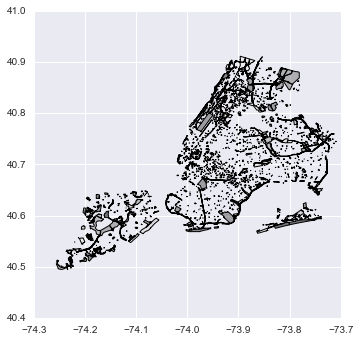

In [121]:
parks.plot()

In [125]:
parks.crs

{'init': u'epsg:4326'}

In [126]:
from fiona.crs import from_epsg

In [128]:
#area in feet sq
NYC_Area = parks.to_crs(epsg=2263).geometry.area.sum()

#convert to miles sq
NYC_Area /= (2.788*10**7) 

print ('total NYC land area: {:.1f} (mi^2)'.format(NYC_Area))

total NYC land area: 44.4 (mi^2)


In [130]:
boroughs = gpd.GeoDataFrame.from_file("smart_cities/NYC_shapefiles/BoroughBoundaries.geojson")
boroughs

,boro_code,boro_name,geometry,shape_area,shape_leng
0,5,Staten Island,(POLYGON ((-74.05050806403247 40.5664220341608...,1623818619.17,330476.02653
1,2,Bronx,(POLYGON ((-73.89680883223774 40.7958084451597...,1186815932.04,463934.696838
2,1,Manhattan,(POLYGON ((-74.01092841268031 40.6844914725429...,636453907.24,358410.672987
3,3,Brooklyn,(POLYGON ((-73.86706149472118 40.5820879767934...,1937474462.47,741074.709979
4,4,Queens,(POLYGON ((-73.83668274106707 40.5949466970158...,3044834738.1,895762.746967


In [138]:
import choroplethNYC

In [145]:
choroplethNYC.choroplethNYC?

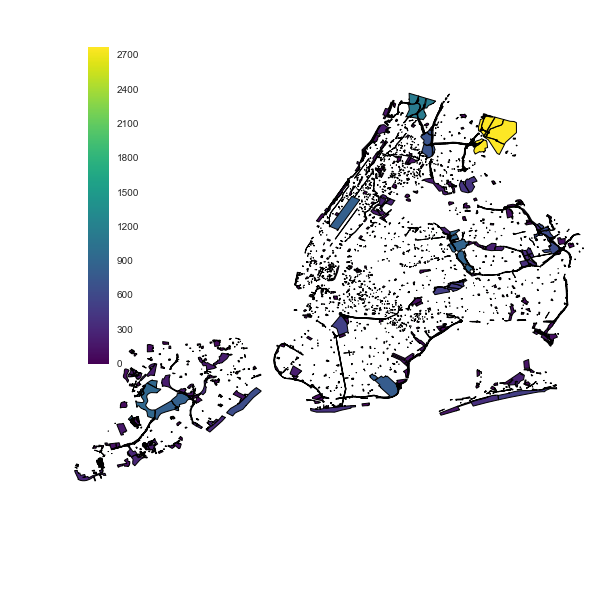

In [151]:
fig, ax, cb = choroplethNYC.choroplethNYC(parks,"acres", cmap = "viridis", cb=True)

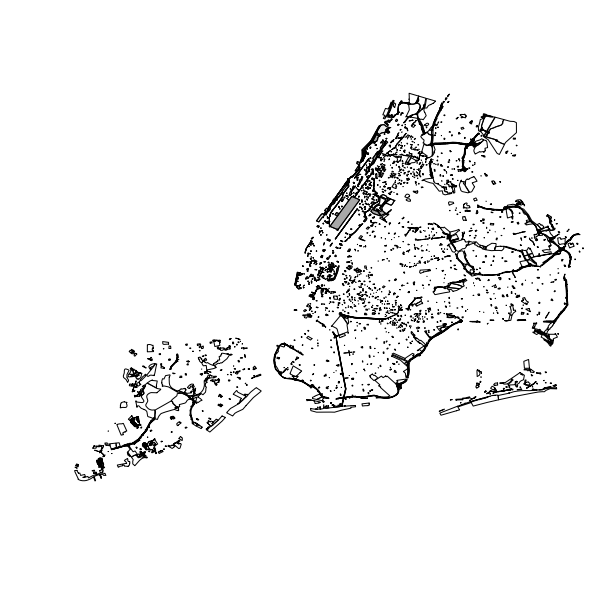

In [195]:
fig, ax = choroplethNYC.choroplethNYC(parks, alpha=0)
parks[parks.intersects(boroughs.iloc[2].geometry)].plot(ax=ax)

In [182]:
council = gpd.GeoDataFrame.from_file("city_council.geojson")

In [183]:
council.head()

,CounDist,geometry
0,1,(POLYGON ((-74.01092841268039 40.6844914732130...
1,2,(POLYGON ((-73.98237340571993 40.7055433511077...
2,3,"POLYGON ((-73.99393587681115 40.7731795132562,..."
3,4,"(POLYGON ((-73.9623659688944 40.7242090616142,..."
4,5,(POLYGON ((-73.96421230395676 40.7466043184766...


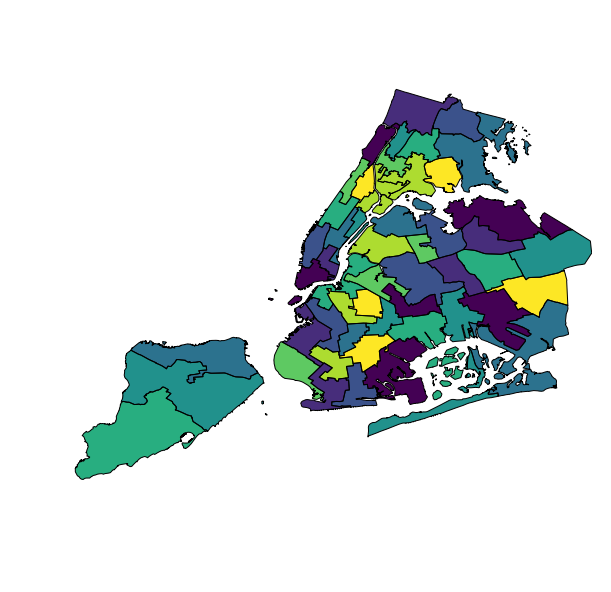

In [188]:
fig, ax = choroplethNYC.choroplethNYC(council, cmap = "viridis")

In [184]:
community = gpd.GeoDataFrame.from_file("community_districts.geojson")

In [185]:
community.head()

,BoroCD,Shape_Area,Shape_Leng,geometry
0,311,1.031759e+08,51566.991644,POLYGON ((-73.97299434004843 40.60881414180238...
1,404,6.563509e+07,36821.131610,POLYGON ((-73.84750820278066 40.73900780703917...
2,203,4.481448e+07,33489.439334,POLYGON ((-73.88072081514282 40.83752126451973...
3,308,4.560542e+07,38211.697490,"POLYGON ((-73.95829216807752 40.6798311339974,..."
4,106,3.870487e+07,40626.734083,(POLYGON ((-73.96421230395678 40.7466043184766...


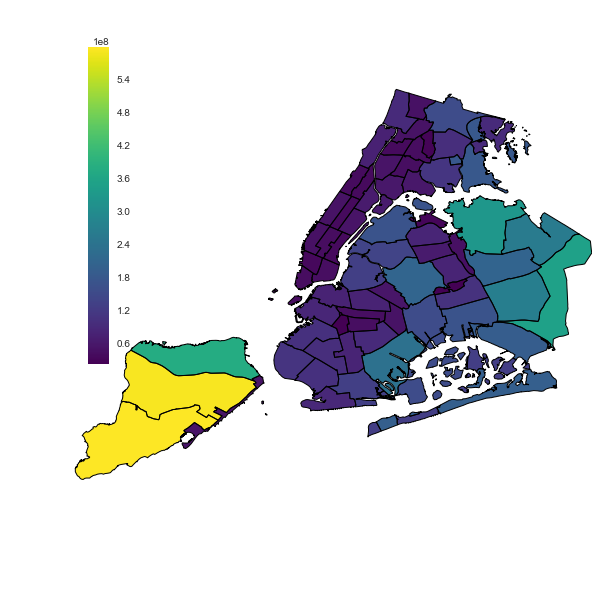

In [190]:
fig, ax, cb = choroplethNYC.choroplethNYC(community, "Shape_Area", cmap = "viridis", cb=True)